In [14]:
import pandas as pd
import numpy as np
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import lib.points as gpxpt
import lib.directions as dir
import lib.map as gmap

%matplotlib inline
DATA_FOLDER = '../data/'

# Interpolation and route splitting

As Google's API does not allow us to directly split the routes into equal intervals, this must be accomplished by manipulating the lat-lng pairs typically present when the route is exported from Google maps as a GPX file. As the points however will not have uniformity as regards the distances between them, these must be re-adjusted (aggregated/ split), and if necessary, new points must be interpolated and projected if the 'as the crow flies' distances between these points are more than the interval we desire. The interval is set as 100 m in this analysis.

In [4]:
gpxpt.writeSplitRoutePoints(os.path.join(DATA_FOLDER,
                                        'route.gpx'), os.path.join(DATA_FOLDER,
                                        'pts.csv'), 100)

In [2]:
points = pd.read_csv(os.path.join(DATA_FOLDER,
                                        'pts.csv'))

# Fetch speeds and distances along the route

Google Directions API is used to fetch the average time taken to traverse a segment and its length along the route. Straight line/ 'as the crow flies' distances were used in the previous block to not have to query for each of the 3000 plus segments of the gpx file waypoints. 

In [2]:
dir.writeDistAndDuration(os.path.join(DATA_FOLDER,
                                        'pts.csv'), os.path.join(DATA_FOLDER,
                                        'speeds.csv'))

In [3]:
speeds = pd.read_csv(os.path.join(DATA_FOLDER,
                                        'speeds.csv'))

In [9]:
speeds['Speed'] = pd.Series(np.where(speeds['Duration'] < 0.000001, 
                                     speeds['Duration'], 
                                     speeds['Distance']/speeds['Duration']), index=speeds.index)

In [11]:
speeds["Milestones"] = pd.Series(speeds.Distance.cumsum(), index=speeds.index)

# Validate alignment of waypoints

The points are plotted on a map to visually inspect if there are any points which are snapped on to roads far away from SH 20.

In [17]:
gmap.plot([(pt["Lat"], pt["Lng"]) for idx, pt in points.iterrows()])

# Speed across the segments

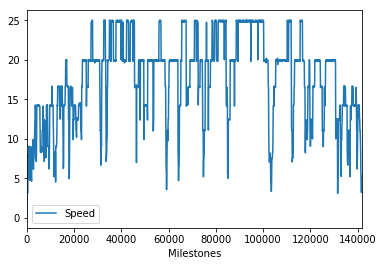

In [15]:
speeds.plot(x='Milestones', y='Speed', kind='line')